In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [3]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:01:01,100,500000,0.043386,0.028814,0.005472,0.002018,0.025622,0.005692,0.589566,...,0.600972,0.579800,387.707581,0.278439,0.208924,2.645595,0.000445,1.0,0.01,0.0
1,0:01:37,200,500000,0.000037,0.004777,0.005286,0.000044,0.008219,0.005159,0.486048,...,0.635619,0.515925,96.185493,0.137339,0.089523,1.144502,0.000229,1.0,0.01,0.0
2,0:02:13,300,500000,0.000238,0.001955,0.006976,0.000037,0.001596,0.006471,0.597375,...,0.468869,0.445507,72.312683,0.077652,0.061527,0.554023,0.000122,1.0,0.01,0.0
3,0:02:48,400,500000,0.227189,0.002461,0.031660,0.013857,0.063159,0.017939,0.480296,...,0.449279,0.347930,38.712814,0.063118,0.058341,0.369578,0.000173,1.0,0.01,0.0
4,0:03:24,500,500000,0.015033,0.004442,0.060835,0.000186,0.064599,0.021815,0.510174,...,0.330589,0.481799,24.595024,0.038440,0.035803,0.298653,0.000112,1.0,0.01,0.0


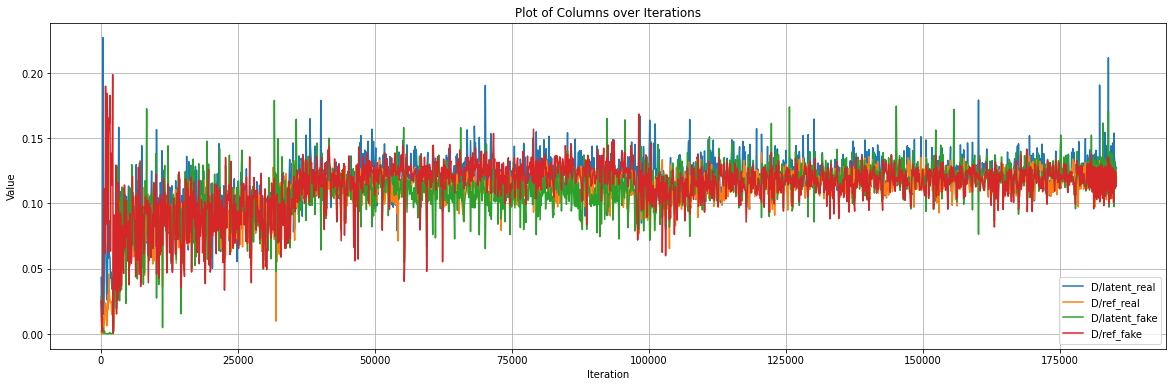

In [5]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

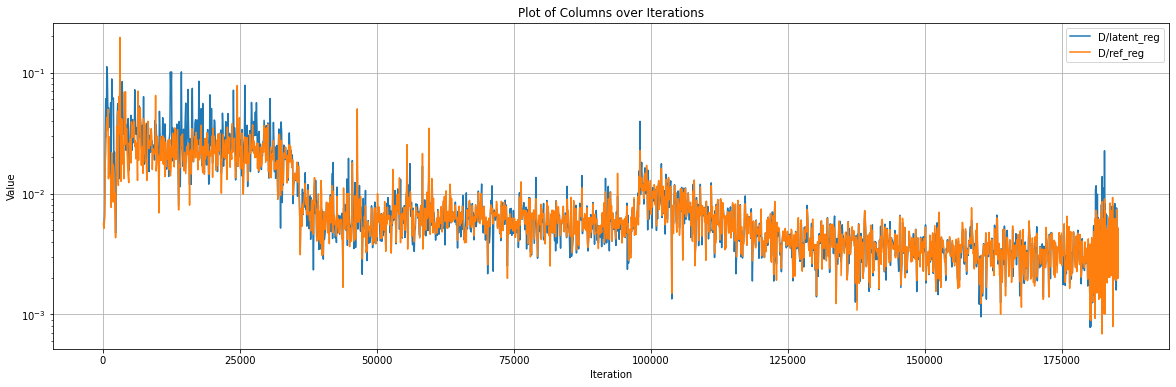

In [6]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

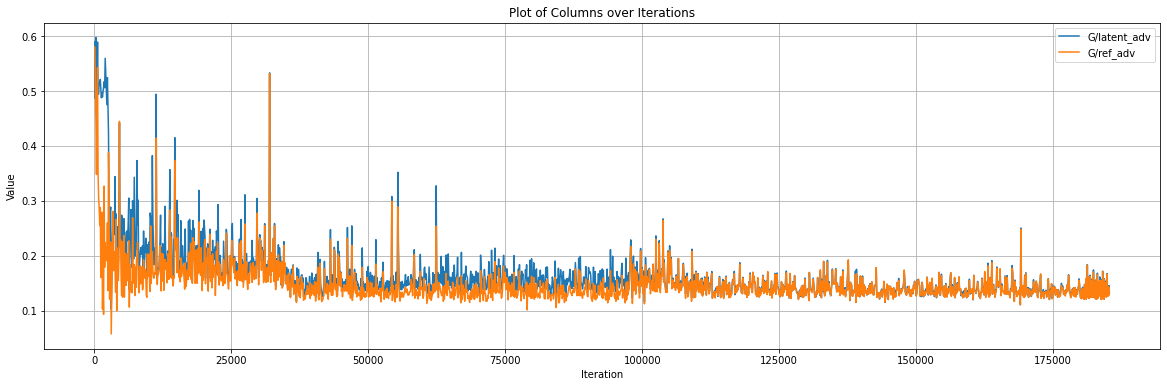

In [7]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

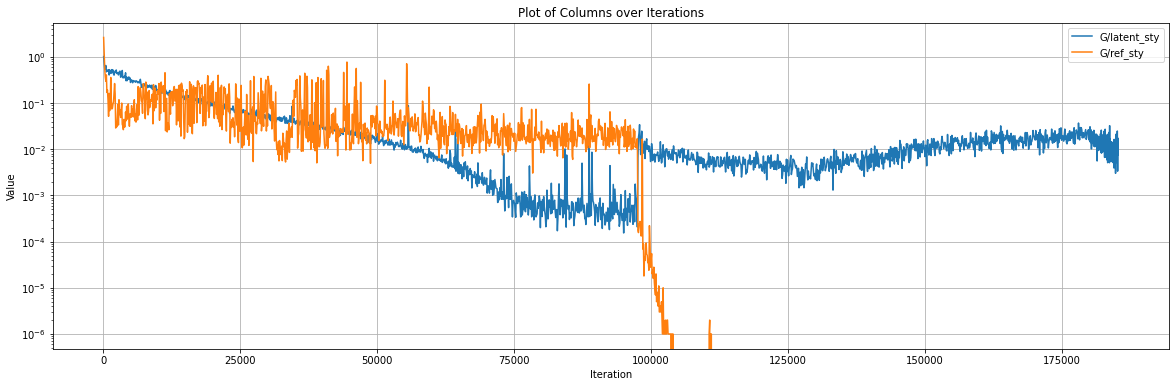

In [8]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

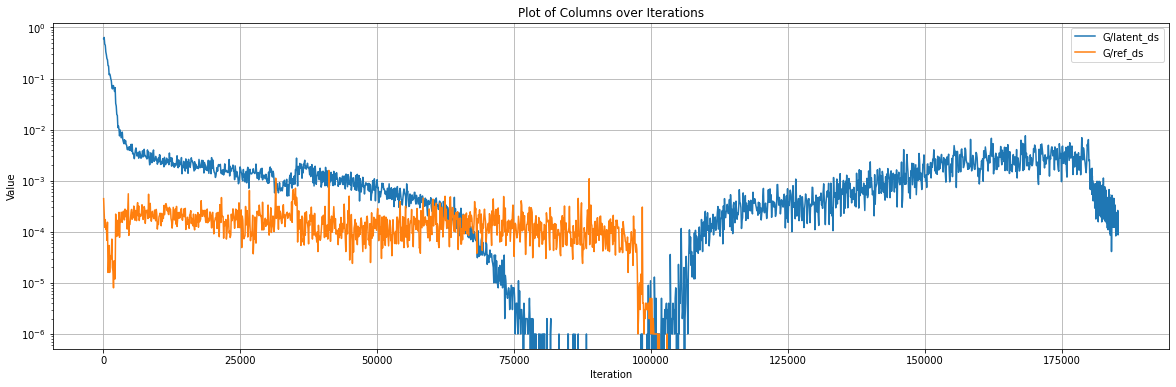

In [9]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

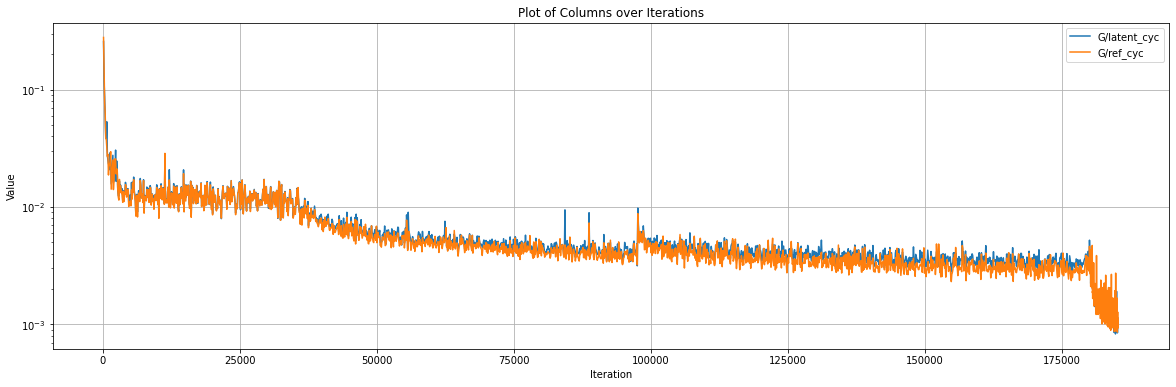

In [10]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

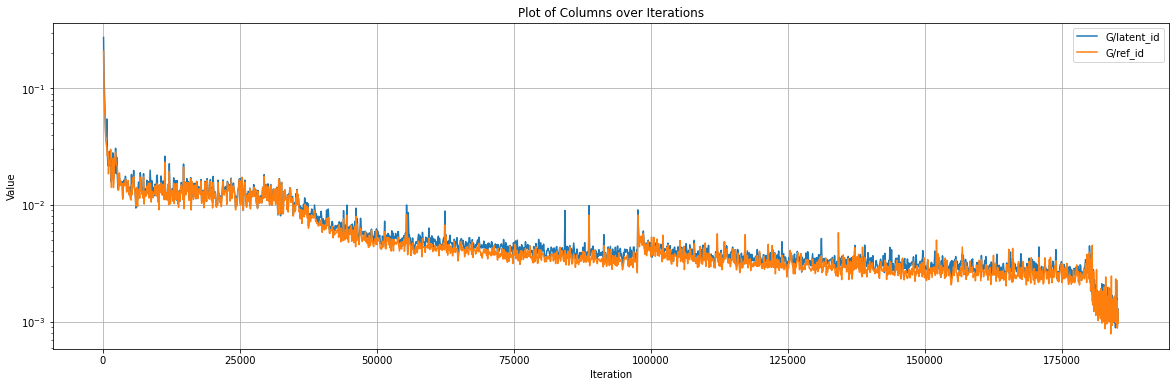

In [11]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

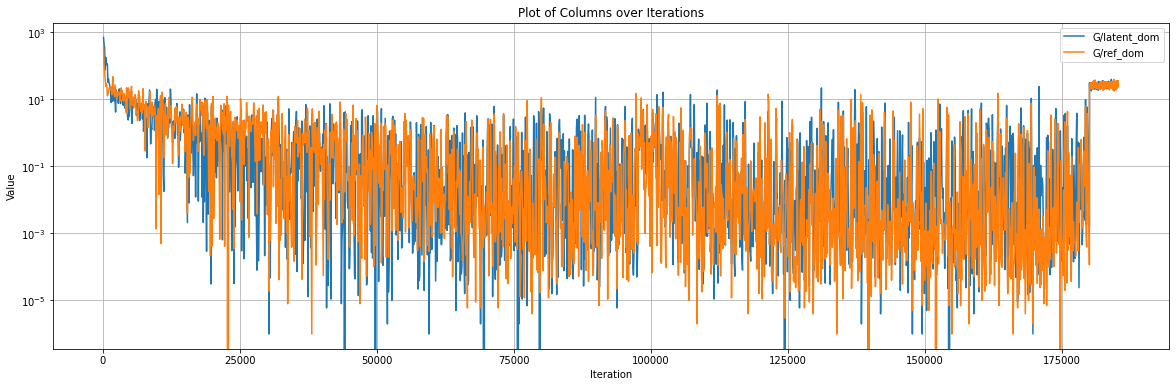

In [12]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

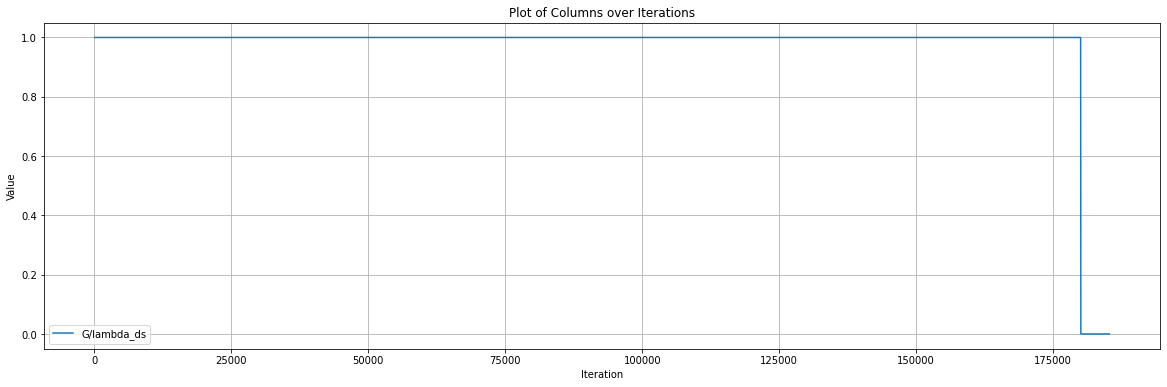

In [13]:
plot_columns(history, ['G/lambda_ds'])

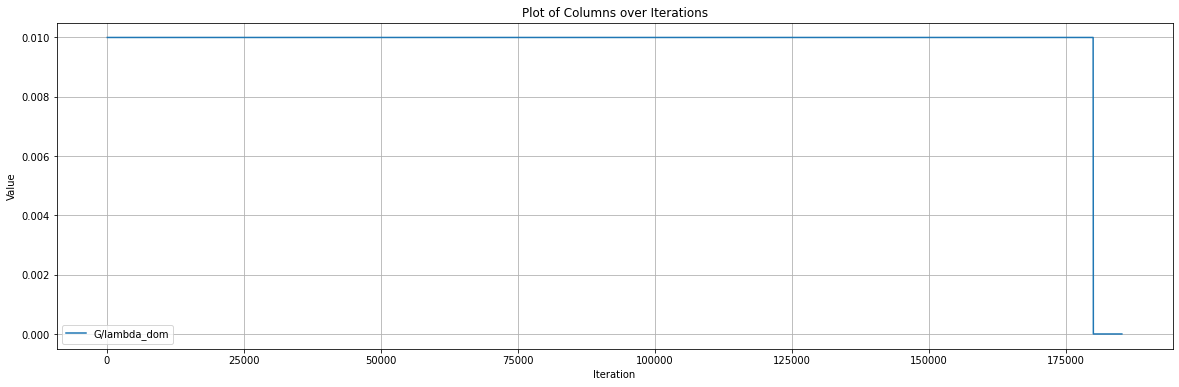

In [14]:
plot_columns(history, ['G/lambda_dom'])

# Metrics

## TSTR Score

In [15]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,domain,accuracy,loss
0,10000,latent,IR,4,0.454352,5.235131
1,10000,latent,IR,5,0.388329,4.076486
2,10000,latent,IR,6,0.435450,5.751688
3,10000,latent,IR,7,0.340584,6.747284
4,10000,latent,Ball,4,0.272679,2.207332


Maximum accuracy for Ball in latent mode: 0.4246 at step 130000
Maximum accuracy for IR in latent mode: 0.7211 at step 184400
Maximum accuracy for OR_centred in latent mode: 0.7054 at step 184400
Maximum accuracy for OR_opposite in latent mode: 0.6624 at step 182200
Maximum accuracy for OR_orthogonal in latent mode: 0.5739 at step 183200


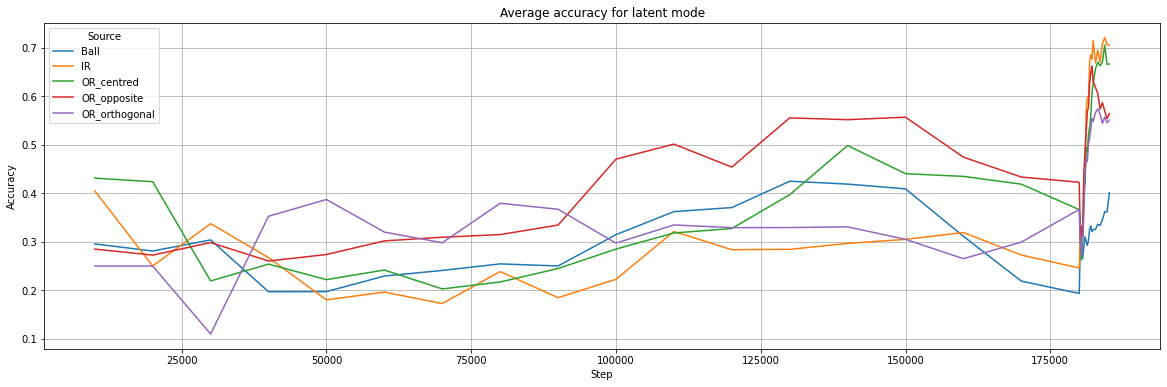

Maximum accuracy for Ball in reference mode: 0.5153 at step 160000
Maximum accuracy for IR in reference mode: 0.7173 at step 184800
Maximum accuracy for OR_centred in reference mode: 0.7292 at step 183200
Maximum accuracy for OR_opposite in reference mode: 0.7001 at step 183200
Maximum accuracy for OR_orthogonal in reference mode: 0.5675 at step 184000


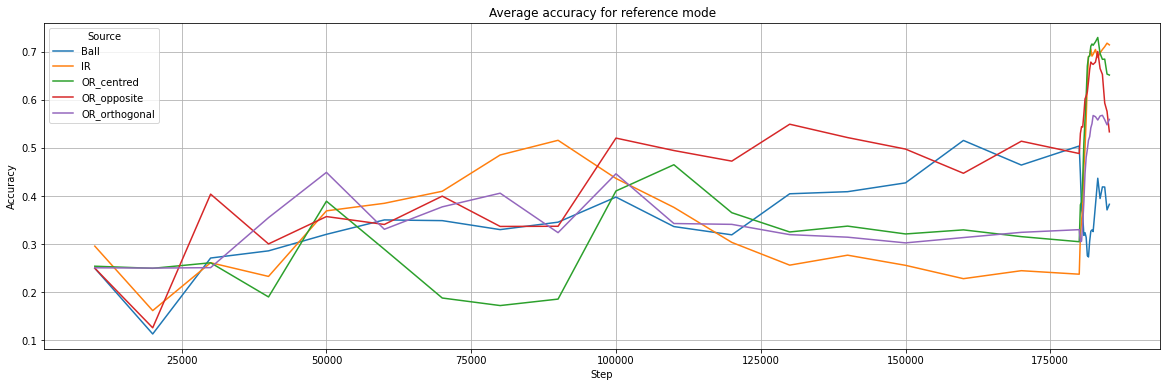

Minimum loss for Ball in latent mode: 2.7516 at step 80000
Minimum loss for IR in latent mode: 1.2819 at step 182000
Minimum loss for OR_centred in latent mode: 1.3672 at step 184400
Minimum loss for OR_opposite in latent mode: 1.3905 at step 182200
Minimum loss for OR_orthogonal in latent mode: 1.5156 at step 80000


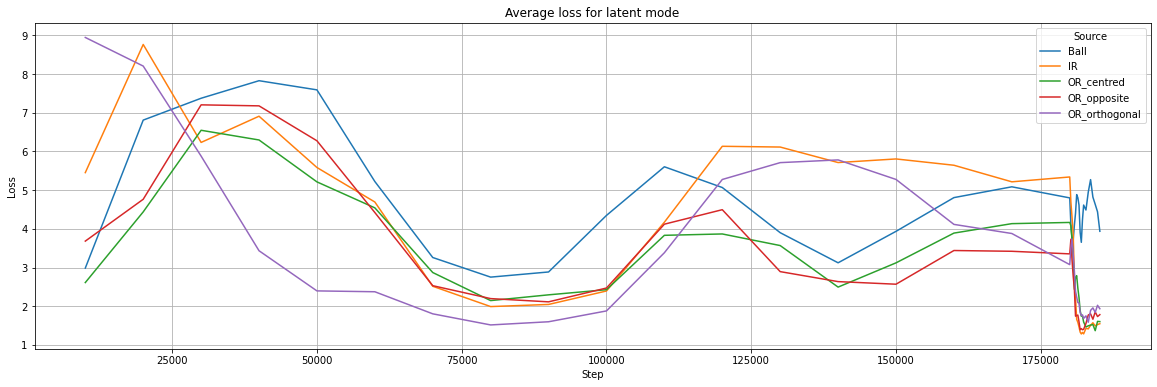

Minimum loss for Ball in reference mode: 2.8590 at step 180000
Minimum loss for IR in reference mode: 1.4486 at step 182400
Minimum loss for OR_centred in reference mode: 1.4965 at step 183200
Minimum loss for OR_opposite in reference mode: 1.6105 at step 182000
Minimum loss for OR_orthogonal in reference mode: 2.0794 at step 182800


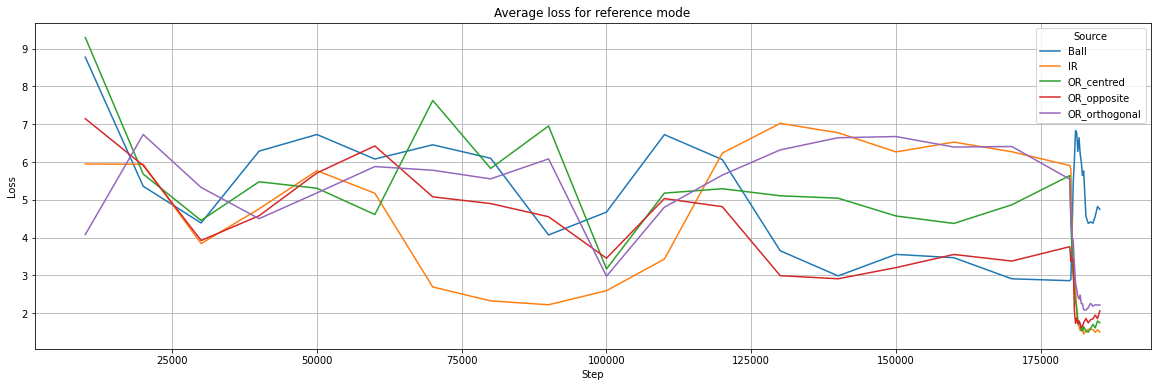

In [16]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for Ball: 0.4180 at step 150000
Maximum accuracy for IR: 0.7156 at step 184400
Maximum accuracy for OR_centred: 0.6997 at step 183200
Maximum accuracy for OR_opposite: 0.6686 at step 182200
Maximum accuracy for OR_orthogonal: 0.5658 at step 183200


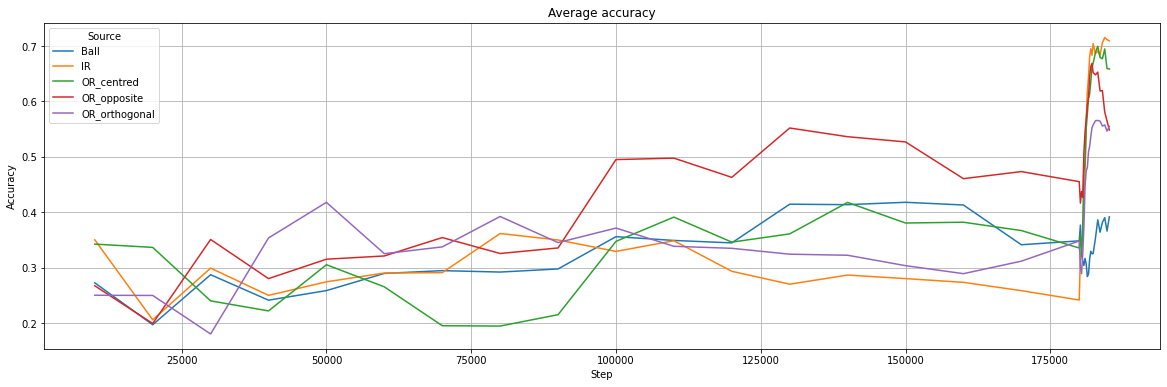

Minimum loss for Ball: 3.0538 at step 140000
Minimum loss for IR: 1.3663 at step 182400
Minimum loss for OR_centred: 1.4880 at step 184400
Minimum loss for OR_opposite: 1.5154 at step 182000
Minimum loss for OR_orthogonal: 1.8666 at step 183200


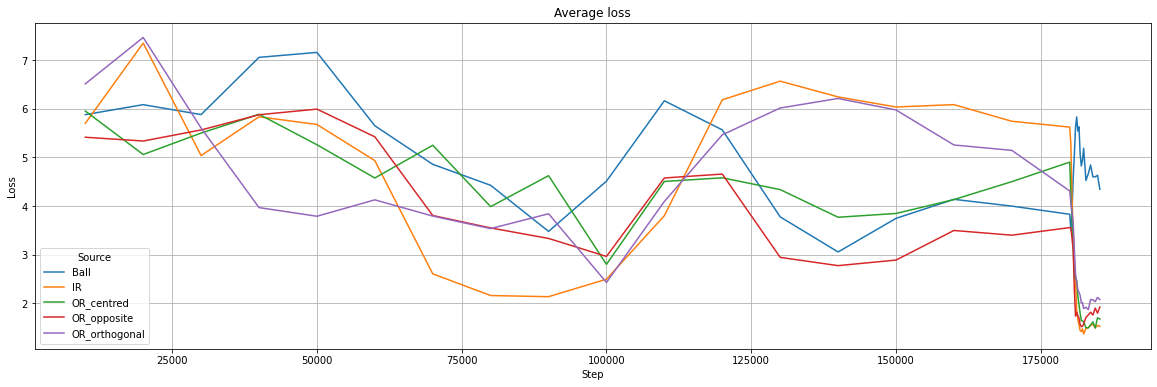

In [17]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.5829 at step 184400
Max in reference mode: 0.6223 at step 183200


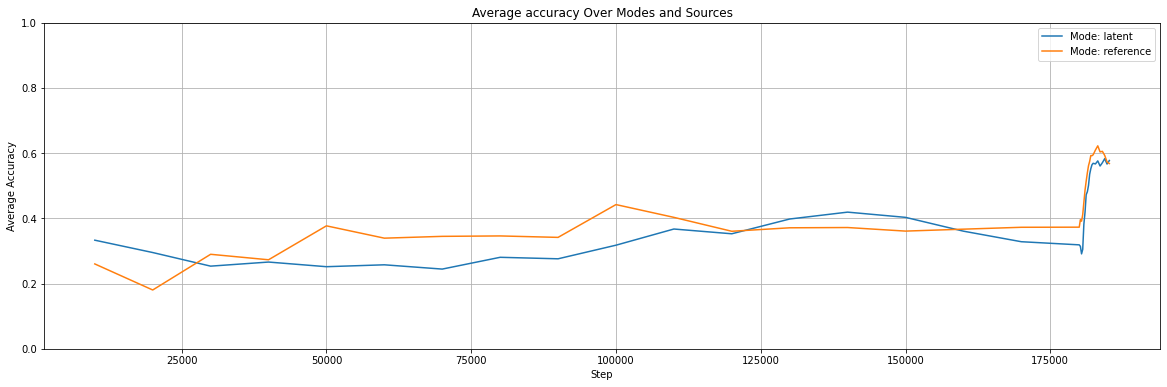

Min in latent mode: 1.9714 at step 182000
Min in reference mode: 2.2665 at step 183200


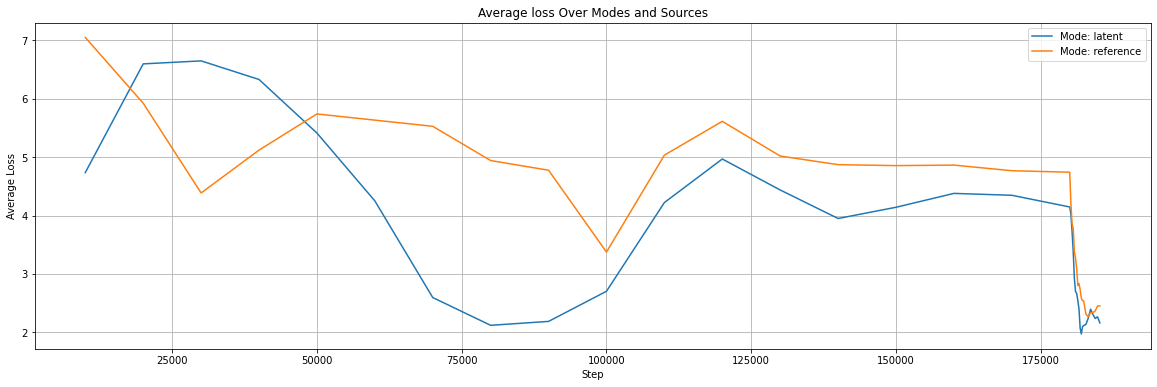

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        # # Find the maximum or minimum value of the metric before step 322000
        # max_before_322000 = mode_data[mode_data['step'] < 322000][metric].max()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
            # step_before_322000 = mode_data[mode_data[metric] == max_before_322000]['step'].values[0]
            # print(f'Max in {mode} mode before finetune: {max_before_322000:.4f} at step {step_before_322000}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

Max: 0.5992 at step 183200


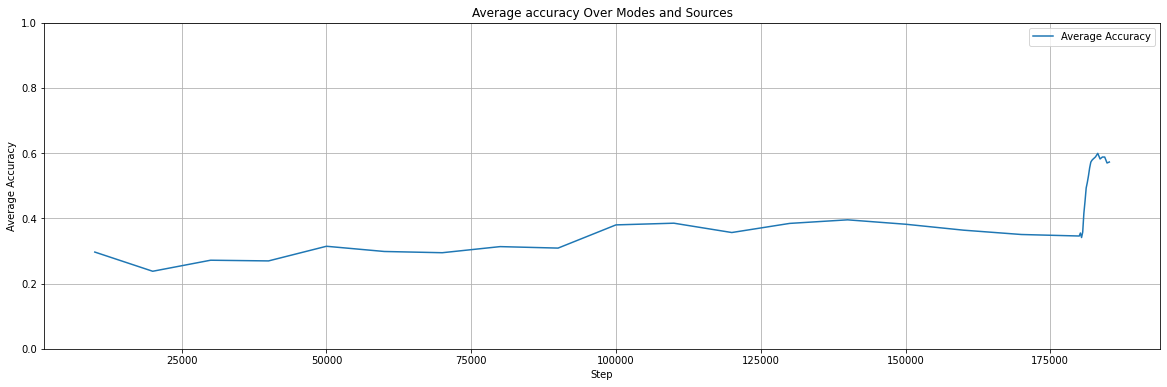

Min: 2.2236 at step 182800


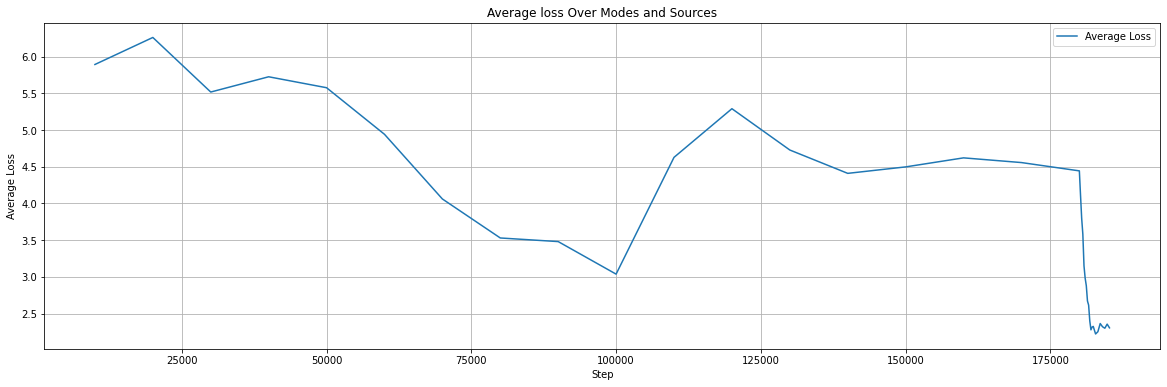

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label=f'Average {metric.capitalize()}')
    max_value = mean_data[metric].max()
    min_value = mean_data[metric].min()
    if metric == 'accuracy':
        step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Max: {max_value:.4f} at step {step}')
    else:
        step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Min: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

## Domain Score

In [20]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,10000,latent,IR,Ball,0.272051,13.753219
1,10000,latent,IR,OR_centred,0.283209,8.864531
2,10000,latent,IR,OR_orthogonal,0.253985,11.688386
3,10000,latent,IR,OR_opposite,0.251328,11.573002
4,10000,latent,Ball,IR,0.272679,5.621827


Maximum accuracy in latent mode: 0.5652 at step 181600


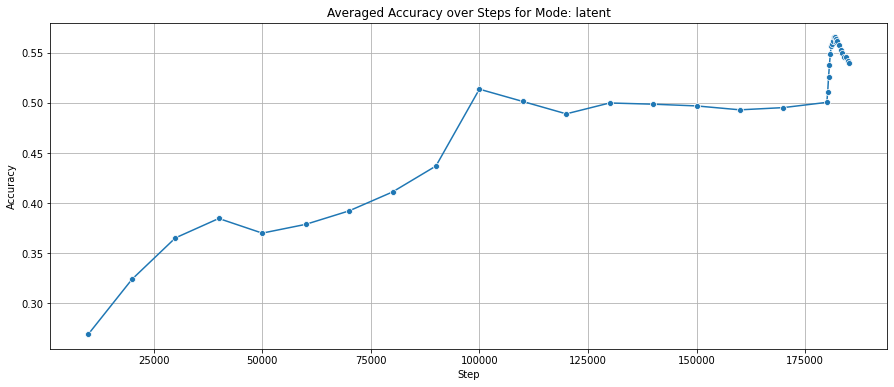

Maximum accuracy in reference mode: 0.5699 at step 181600


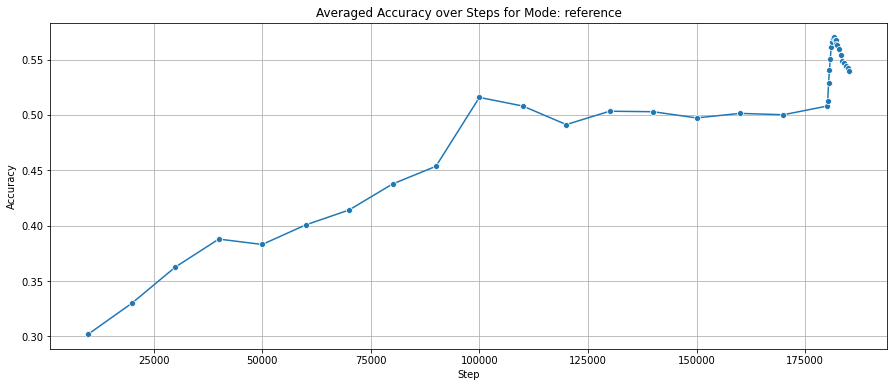

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')

Maximum accuracy in reference mode: 0.5675 at step 181600


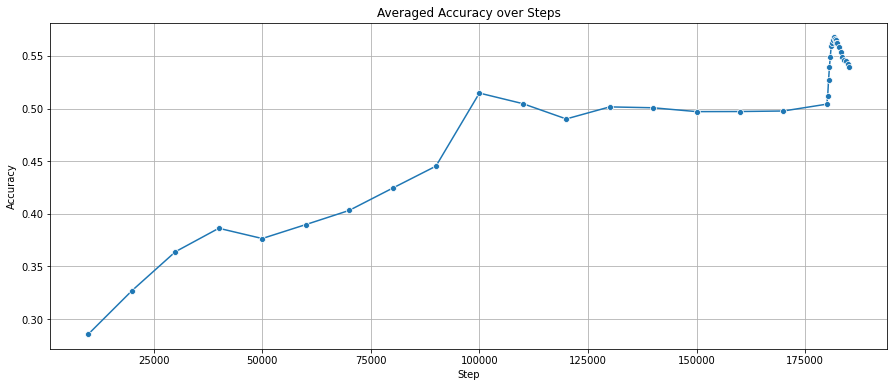

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, metric):
    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



plot_metric_averaged(domain_scores, 'accuracy')

## Distance Score

In [23]:
distance_scores = pd.read_csv('eval/dist_scores.csv')
distance_scores.head()

,step,mode,source,target,domain,distance
0,10000,latent,IR,Ball,0,2.994224
1,10000,latent,IR,Ball,1,1.919986
2,10000,latent,IR,Ball,2,0.819809
3,10000,latent,IR,Ball,3,0.301680
4,10000,latent,IR,OR_centred,0,3.670416


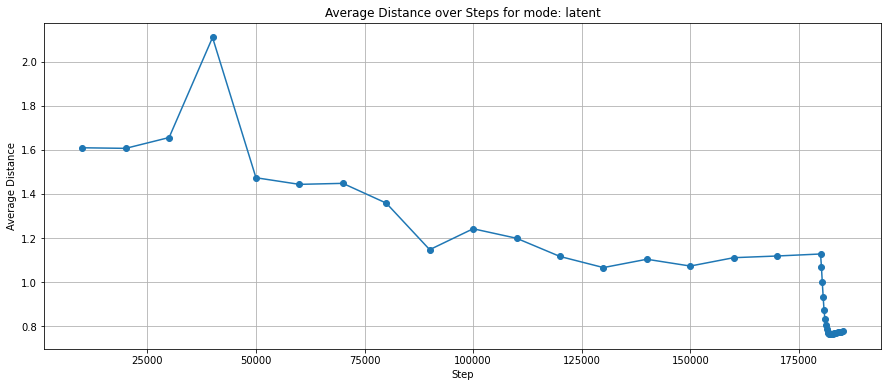

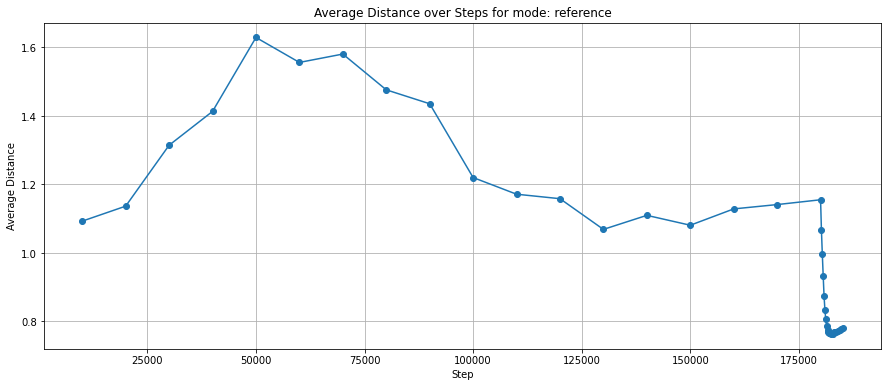

In [24]:
def plot_dist(data, mode):
    # Filter the dataframe by the given mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = filtered_data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps for mode: {mode}')
    plt.grid(True)
    plt.show()

for mode in distance_scores['mode'].unique():
    plot_dist(distance_scores, mode)

Minimum distance: 0.7644 at step 182400


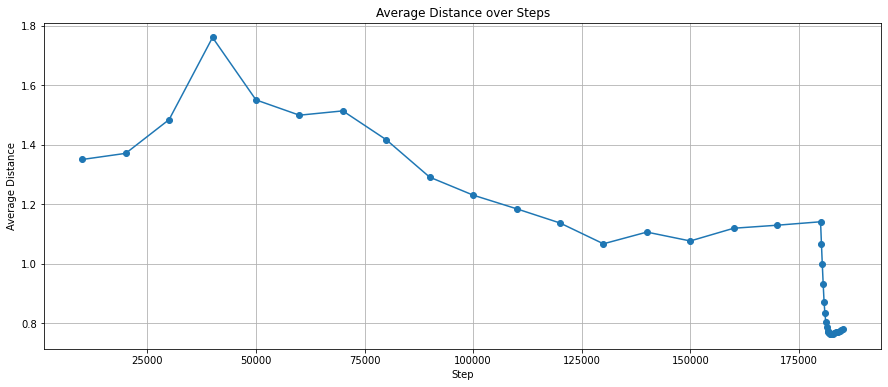

In [25]:
def plot_dist(data):
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = data.groupby('step')['distance'].mean().reset_index()

    min_value = grouped_data['distance'].min()
    min_step = grouped_data[grouped_data['distance'] == min_value]['step'].values[0]
    print(f'Minimum distance: {min_value:.4f} at step {min_step}')
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps')
    plt.grid(True)
    plt.show()

plot_dist(distance_scores)